In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Optional
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

# This needs to be replaced with OpenAI Chat Models

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI()

In [4]:
class LLMState(TypedDict):

    question: str
    answer: str

In [5]:
from pydantic import BaseModel, Field

class LLMStatePydantic(BaseModel):

    question: str = Field(..., description="The question to ask")
    answer: Optional[str] = Field(None, description="The answer to the question")

In [6]:
def llm_qa(state: LLMStatePydantic) -> LLMStatePydantic:
    question = state.question
    answer = model.invoke(question)
    state.answer = answer.content
    return state

In [7]:
graph = StateGraph(LLMStatePydantic)

# Node
graph.add_node("llm_qa", llm_qa)

# Edges
graph.add_edge(START, "llm_qa")
graph.add_edge("llm_qa", END)

# Compile
workflow = graph.compile()

In [8]:
# Execute
initial_state = {"question": "What is Football?"}
final_state = workflow.invoke(initial_state)
final_state

{'question': 'What is Football?',
 'answer': "Football, also known as soccer, is a team sport that is played between two teams of eleven players each. The objective of the game is to score by kicking a ball into the opposing team's goal. Players use their feet, head, or body to control and pass the ball. Football is the most popular sport in the world, with millions of fans and players participating in the game at all levels. It is played on a rectangular field with goals at each end, and the team with the most goals at the end of the game is declared the winner."}

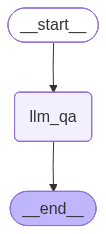

In [9]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())